In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create the matrix with n-features
n_features = 2
n_objects = 20

# create row array
X1 = np.arange(1, 11)
#print(X1, X1.shape)
# create from X1 column vector
X1 = X1[:, np.newaxis]
#print(X1, X1.shape)
# X2 should be automatically be column vector
X2 = X1 * 2 + np.random.randint(-3, 3, size=X1.shape)
#print(X2, X2.shape)



In [3]:
# Atest = np.column_stack((X1, X2))
A = np.hstack((X1, X2))
# Amean = np.vstack()
Acentered = A - A.mean(axis=0)
print(A)


[[ 1  1]
 [ 2  1]
 [ 3  7]
 [ 4  8]
 [ 5 10]
 [ 6 10]
 [ 7 13]
 [ 8 13]
 [ 9 17]
 [10 20]]


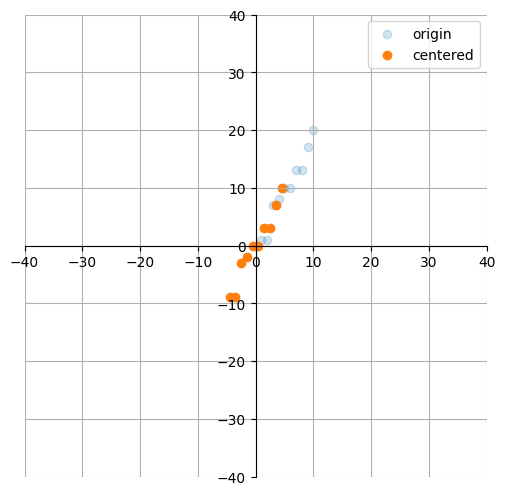

In [4]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(A[:,0], A[:,1], label='origin', alpha=0.2)
ax.scatter(Acentered[:,0], Acentered[:,1], label='centered')
# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set(xlim=(-40, 40), ylim=(-40, 40))

ax.set_aspect('equal')
ax.legend()

plt.grid()

**Definition of covariance**\
For two jointly distributed real-valued random variables $X$ and $Y$ with finite second moments, the covariance is defined as the expected value (or mean) of the product of their deviations from their individual expected values

*Expression for covariance*
$$cov(X, Y) = E[(x_i - E[X])(y_i - E[Y])]$$
$$cov(X, Y) = E[XY] - E[X]E[Y]$$
where $E[X]$ is the expected value of $X$, also known as the mean of $X$. The covariance is also sometimes denoted $\sigma _{XY}$ or $\sigma (X, Y)$ in analogy to variance


**Definition of deviation**\
is a measure of difference between the observed value of a variable and some other value, often that variable's mean

*Expression for deviation*
$$
    D_i = |x_i - m(X)|=D_i = |x_i - E[X]|
$$

**Definition of variance**\
The variance of a random variable $X$ is the expected value of the squared deviation from the mean of $X$, $\mu = E[X]$:
$$
Var(X) = E[(x_i - E(X))^2]
$$

**Standard deviation**\
In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values.
$$\sigma = \sqrt{Var(X)} = \sqrt{E[(x_i - E(X))^2]}

In [5]:
# Get the covariation matrix for out data
covmat = np.cov(Acentered.T)
print(covmat, "\n")
print("Variance of X: ", covmat[0,0])
print("Variance of Y: ", covmat[1,1])
print("Covariance X and Y: ", covmat[0,1])

[[ 9.16666667 18.22222222]
 [18.22222222 38.        ]] 

Variance of X:  9.166666666666666
Variance of Y:  38.0
Covariance X and Y:  18.22222222222222


In [6]:
# Find the eigenvalues and eigenvectors
eigenvalue, eigenvector = np.linalg.eig(covmat)
print(f'eigenvector for covmat is \n{eigenvector}')
print(f'eigenvalue for covmat is \n{eigenvalue}')

eigenvector for covmat is 
[[-0.9001272  -0.43562716]
 [ 0.43562716 -0.9001272 ]]
eigenvalue for covmat is 
[ 0.34780751 46.81885916]


In [7]:
# Change the direction of 2nd vector
eigenvector[:, 1] = -eigenvector[:, 1]

In [8]:
# the direction of maximum dispersion is:
print(f'direction of maximum dispersion is {eigenvector[:,1]}')

direction of maximum dispersion is [0.43562716 0.9001272 ]


In [25]:
# Standard deviation
sigma = np.std(Acentered, axis=0)
print(sigma)
# How many sigmas we interests
n = 1
# main axis for ellipse R1
R1 = n * max(sigma)
# sub axis for ellipse R2
R2 = n * min(sigma)

print(R1, R2)

[2.87228132 5.84807661]
5.848076606885378 2.8722813232690143


In [26]:
angle = np.dot(eigenvector[:, 1], np.array([1, 0])) / np.linalg.norm(eigenvector[:, 1]) / np.linalg.norm(np.array([1, 0]))
angle = np.pi / 2 - angle

In [27]:
Acentered[:, 0].std()

2.8722813232690143

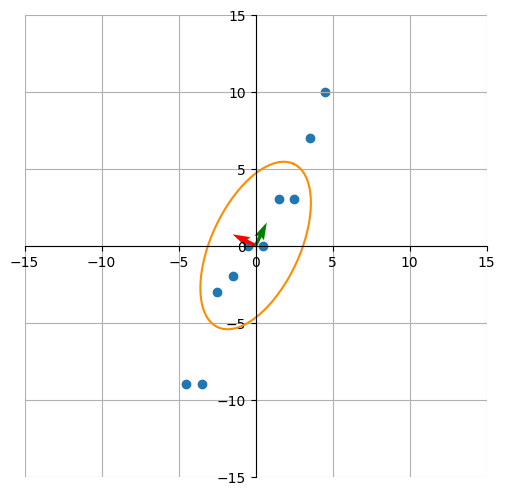

In [28]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
origin = np.array([[0, 0], [0, 0]])

# Plot our centered data to the figure
ax.scatter(Acentered[:, 0], Acentered[:, 1])

# Show the coordinate frame for eigenvectors
origin = np.array([[0, 0], [0, 0]])
plt.quiver(*origin, eigenvector[0, :], eigenvector[1, :], color=['r', 'g'])

# Ellipse
t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([R1*np.cos(t) , R2*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[np.cos(angle) , -np.sin(angle)],[np.sin(angle) , np.cos(angle)]])  
     #2-D rotation matrix

Ell_rot = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = np.dot(R_rot, Ell[:,i])

plt.plot(Ell_rot[0,:] , Ell_rot[1,:],'darkorange' )    #rotated ellipse

ax.set_aspect(aspect='equal')

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set(xlim=(-15, 15), ylim=(-15, 15))

# Create grid
ax.grid()

In [117]:
eigenvector[:, 1].dot(Acentered.T)


array([-11.05404607,  -7.91488555,  -4.77572504,  -3.44372702,
        -1.20814776,   0.12385026,   4.16659202,   6.40217129,
         6.83058805,  10.87332982])

In [121]:
eigenvector[:, 1][np.newaxis, :].shape, Acentered.T.shape

((1, 2), (2, 10))

{'1': 's'}
